In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/kamlesh/AnacondaProjects/Dataquest/Data/bike_rental_hour.csv')

Many American cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

Hadi Fanaee-T at the University of Porto compiled this data into a CSV file, which you'll be working with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the University of California, Irvine's website. If you need help at any point, you can consult the solution notebook in our GitHub repository.

Here's what the first five rows look like




In [2]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40




Here are the descriptions for the relevant columns:

    instant - A unique sequential ID number for each row
    dteday - The date of the rentals
    season - The season in which the rentals occurred
    yr - The year the rentals occurred
    mnth - The month the rentals occurred
    hr - The hour the rentals occurred
    holiday - Whether or not the day was a holiday
    weekday - The day of the week (as a number, 0 to 7)
    workingday - Whether or not the day was a working day
    weathersit - The weather (as a categorical variable)
    temp - The temperature, on a 0-1 scale
    atemp - The adjusted temperature
    hum - The humidity, on a 0-1 scale
    windspeed - The wind speed, on a 0-1 scale
    casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
    registered - The number of registered riders (people who had already signed up)
    cnt - The total number of bike rentals (casual + registered)

In this project, you'll try to predict the total number of bikes people rented in a given hour. You'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, you'll create a few different machine learning models and evaluate their performance.

https://www.forbes.com/sites/naomirobbins/2012/01/04/a-histogram-is-not-a-bar-chart/#6dd28b06d775

Innstructions

    Use the pandas library to read bike_rental_hour.csv into the dataframe bike_rentals.
    Print out the first few rows of bike_rentals and take a look at the data.
    Make a histogram of the cnt column of bike_rentals, and take a look at the distribution of total rentals.
    Use the corr method on the bike_rentals dataframe to explore how each column is correlated with cnt.


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

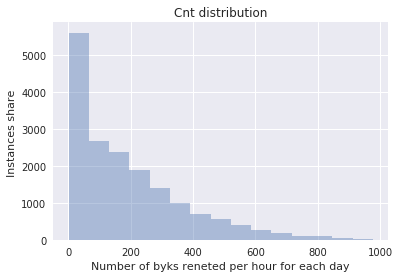

In [13]:
fig=plt.figure() 
#Plots in matplotlib reside within a figure object, use plt.figure to create new figure
#Create one or more subplots using add_subplot, because you can't create blank figure
ax = fig.add_subplot(1,1,1)

#Variables
#ax.hist(df['cnt'],bins = 7) # Here you can play with number of bins
sns.distplot(df['cnt'],bins = 15,kde = False)
plt.title('Cnt distribution')
plt.xlabel('Number of byks reneted per hour for each day')
plt.ylabel("Instances share ")
plt.show()


Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

    temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
    windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
    "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
    "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.

Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".


In [14]:
correlation_matrix = df.corr()
correlation_matrix['cnt']


instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

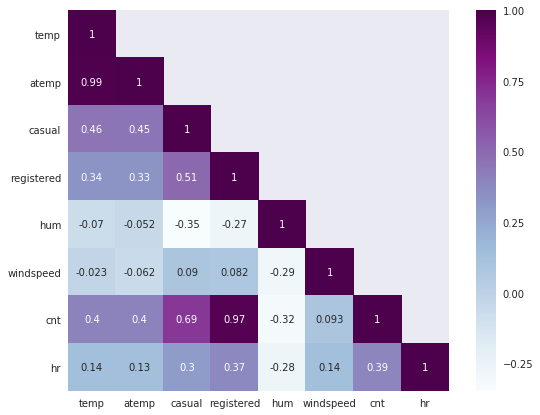

In [31]:

corrMatt = df[["temp","atemp","casual","registered","hum","windspeed","cnt",'hr']].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig,ax= plt.subplots()
fig.set_size_inches(10,7)
with sns.axes_style("white"):
    ax = sns.heatmap(corrMatt, mask=mask,cmap='BuPu',square= True,annot=True)

In [34]:
def assign_label(h):
    if h >= 6 and h < 12:
        return 1
    if h >= 12 and h < 18:
        return 2
    if h >= 18 and h < 24:
        return 3
    if h >= 0 and h < 6:
        return 4

df['time_label'] = df['hr'].apply(assign_label)    
df.head()    

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,4


In [45]:
#preparing the test and the training data
train = df.sample(frac = 0.8)
test = df.loc[~df.index.isin(train.index)]

# Preparing the columns wanted for the regression
predictors = list(df.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor
